In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pandas as pd
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('ml_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
          'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
          'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
          'PETRO_ELECTRICPOWER, Thousand Barrels per Day']]

y = data['CO2, Million Metric Tons']

# Shuffle data
X, y = shuffle(X, y, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


R² (Training): 0.9999957610966625
R² (Testing): 0.96
Mean Absolute Error: 7.78
Mean Squared Error: 102.03
Root Mean Squared Error: 10.10


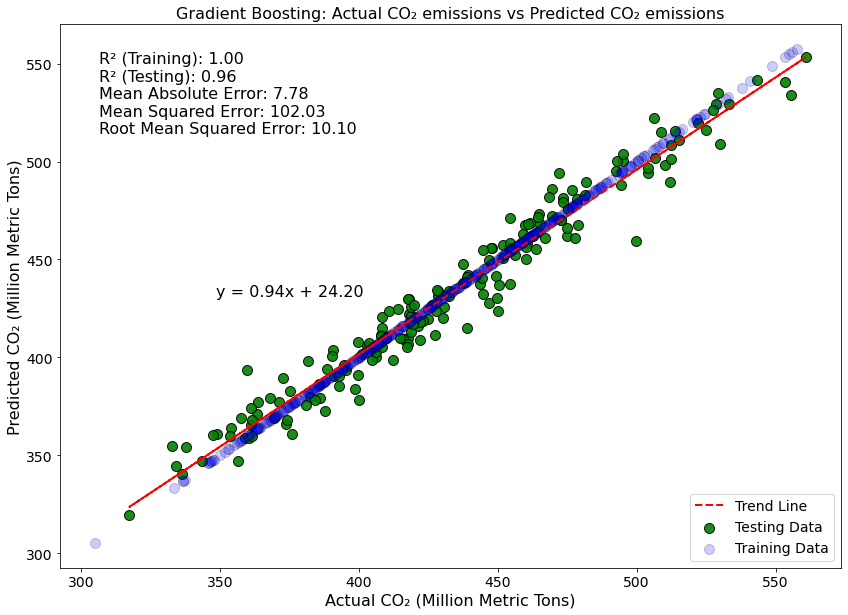

In [3]:
# Create the Gradient Boosting model
regressor = xgb.XGBRegressor()

# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = regressor.predict(X_train)

# Calculate the R-squared score for the training data
r2_train = r2_score(y_train, y_pred_train)

# Predict the target variable for the test data
y_pred = regressor.predict(X_test)


# Calculate evaluation metrics
r2_test = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print results
print("R² (Training):", r2_train)
print("R² (Testing):", format(r2_test, ".2f"))
print("Mean Absolute Error:", format(mae, ".2f"))
print("Mean Squared Error:", format(mse, ".2f"))
print("Root Mean Squared Error:", format(rmse, ".2f"))



# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)

# Perform linear regression to get the line equation
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Add the equation as text on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

plt.figure(figsize=(14, 10))  # Specify the width and height in inches

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, label='Testing Data', color='green', alpha=0.9, s=100, edgecolors='black')
plt.scatter(y_train, y_pred_train, label='Training Data', color='blue', alpha=0.2, s=100, edgecolors='black')
plt.plot(y_test, trendline_fn(y_test), color='red', linewidth=2, linestyle='--', label='Trend Line')
plt.xlabel('Actual CO₂ (Million Metric Tons)', fontsize=16)
plt.ylabel('Predicted CO₂ (Million Metric Tons)', fontsize=16)
plt.title('Gradient Boosting: Actual CO₂ emissions vs Predicted CO₂ emissions', fontsize=16)

# Annotate statistical parameters on the plot
textstr = f'R² (Training): {format(r2_train, ".2f")}\nR² (Testing): {format(r2_test, ".2f")}\nMean Absolute Error: {format(mae, ".2f")}\nMean Squared Error: {format(mse, ".2f")}\nRoot Mean Squared Error: {format(rmse, ".2f")}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', fontsize=16)

# Adjust the position of the trendline function text annotation
plt.text(0.2, 0.5, equation, transform=plt.gca().transAxes, fontsize=16)

# Place the legend in the bottom right corner
plt.legend(loc='lower right', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.savefig('Gradient Boosting Actual CO₂ emissions vs Predicted CO₂ emissions.jpg')
plt.show()



In [4]:
# Perform 5-fold cross-validation and get the R-squared scores
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R² Scores:", cv_scores)

# Calculate the mean R-squared score
mean_r2 = np.mean(cv_scores)
print("Mean R² Score:", mean_r2)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("R²:", format(r2, ".2f"))
print("Mean Absolute Error:", format(mae, ".2f"))
print("Mean Squared Error:", format(mse, ".2f"))
print("Root Mean Squared Error:", format(rmse, ".2f"))

# Perform 5-fold cross-validation and calculate MSE for each fold
mse_cv_scores = -cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", mse_cv_scores)

print("Mean MSE:", format(sum(mse_cv_scores)/5, ".2f"))


Cross-Validation R² Scores: [0.91887486 0.93764308 0.96096917 0.95549539 0.95747023]
Mean R² Score: 0.9460905459374427
R²: 0.96
Mean Absolute Error: 7.78
Mean Squared Error: 102.03
Root Mean Squared Error: 10.10
Cross-Validation MSE Scores: [190.97180441 142.88483129  91.25081386 101.23279499  98.17349448]
Mean MSE: 124.90


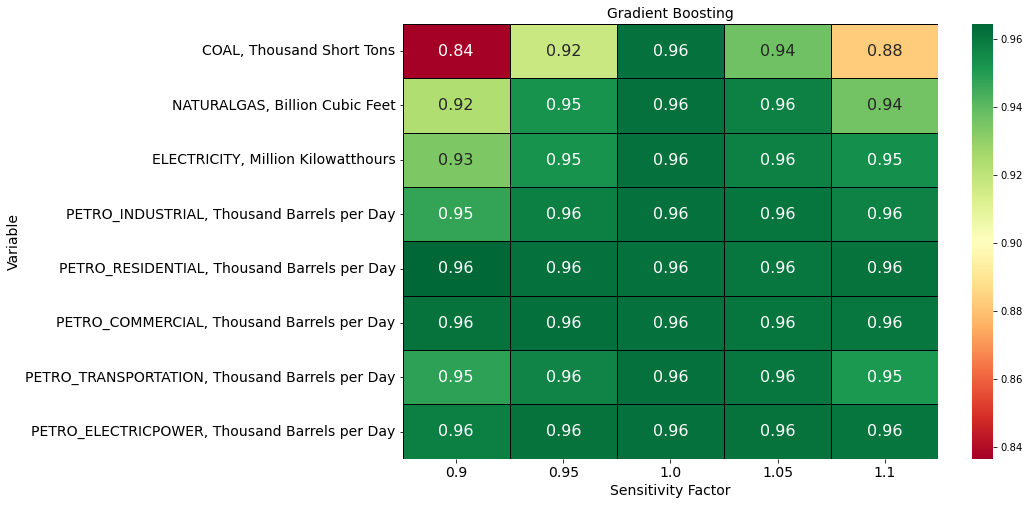

Sensitivity Analysis for variable: COAL, Thousand Short Tons
Sensitivity: 0.9, R-squared score: 0.8364773393279835
Sensitivity: 0.95, R-squared score: 0.9173996386946454
Sensitivity: 1.0, R-squared score: 0.961858942343657
Sensitivity: 1.05, R-squared score: 0.9365406721713618
Sensitivity: 1.1, R-squared score: 0.8826253334706896

Sensitivity Analysis for variable: NATURALGAS, Billion Cubic Feet
Sensitivity: 0.9, R-squared score: 0.9231822359863975
Sensitivity: 0.95, R-squared score: 0.9526931123005342
Sensitivity: 1.0, R-squared score: 0.961858942343657
Sensitivity: 1.05, R-squared score: 0.9577973036522969
Sensitivity: 1.1, R-squared score: 0.9360358918305125

Sensitivity Analysis for variable: ELECTRICITY, Million Kilowatthours
Sensitivity: 0.9, R-squared score: 0.9344095173810424
Sensitivity: 0.95, R-squared score: 0.9528478419320157
Sensitivity: 1.0, R-squared score: 0.961858942343657
Sensitivity: 1.05, R-squared score: 0.9576540832728773
Sensitivity: 1.1, R-squared score: 0.95391

In [5]:
# Define the variables to analyze for sensitivity
variables_to_analyze = ['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
                        'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
                        'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
                        'PETRO_ELECTRICPOWER, Thousand Barrels per Day']


# Initialize a dictionary to store sensitivity analysis results
sensitivity_results = {}

# Iterate over the variables for sensitivity analysis
for variable_name in variables_to_analyze:
    # Get the original values of the selected variable
    original_values = X_test[variable_name].copy()

    # Initialize a list to store sensitivity analysis results for the current variable
    variable_sensitivity_results = []

    # Iterate over different sensitivities (e.g., increase by 10%)
    for sensitivity in [0.9, 0.95, 1.0, 1.05, 1.1]:
        # Modify the values of the selected variable
        modified_values = original_values * sensitivity
        X_test_modified = X_test.copy()
        X_test_modified[variable_name] = modified_values

        # Make predictions using the modified dataset
        y_pred_modified = regressor.predict(X_test_modified)

        # Calculate the R-squared score for the modified predictions
        r2_modified = r2_score(y_test, y_pred_modified)

        # Store the sensitivity analysis results
        variable_sensitivity_results.append(r2_modified)

    # Store the sensitivity analysis results for the current variable in the dictionary
    sensitivity_results[variable_name] = variable_sensitivity_results

# Create a matrix of sensitivity analysis results
sensitivity_matrix = np.array([sensitivity_results[variable] for variable in variables_to_analyze])

# Create a heatmap to visualize the sensitivity analysis results
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

sns.heatmap(sensitivity_matrix, cmap='RdYlGn', annot=True, fmt='.2f', annot_kws={'fontsize': 16},
            xticklabels=[0.9, 0.95, 1.0, 1.05, 1.1], yticklabels=variables_to_analyze,
            linewidths=0.5, linecolor='black')

plt.xlabel('Sensitivity Factor', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.title('Gradient Boosting', fontsize=14)
'Sensitivity Analysis of different machine learning methods: Changes in the R² when the selected variable is perturbed'
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('Gradient Boosting Sensitivity Analysis.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Print the sensitivity analysis results
for variable_name, sensitivity_scores in sensitivity_results.items():
    print(f"Sensitivity Analysis for variable: {variable_name}")
    for i, sensitivity in enumerate([0.9, 0.95, 1.0, 1.05, 1.1]):
        print(f"Sensitivity: {sensitivity}, R-squared score: {sensitivity_scores[i]}")
    print()
